# Twitter Visualization Problem 

This problem guides through an example of exploratory data analysis with clustering methods.
You will implement a data exploration system that applies a combination of clustering methods
to explore frequently visited locations in California from geo-referenced social media data. You will study the properties and computational requirements of some common clustering methods
on a medium-scale dataset and then design and implement a system for processing 1 million data
samples.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io
import pandas as pd
import math
from wordcloud import WordCloud

from sklearn.cluster import KMeans, DBSCAN, 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline  

In [2]:
tweets = [{
	"user_id": 224874450,
	"text": "@Tanner_Cortez hey checkout the website: http://t.co/LuktJ6hiws",
	"timeStamp": "Wed Sep 11 04:38:08 +0000 2013",
	"lat": 37.44609999,
	"lng": -121.88355687,
	"id": 377652254096228352
}, {
	"user_id": 312179473,
	"text": "@Lennayy7 \ud83d\ude2a",
	"timeStamp": "Wed Sep 11 04:38:08 +0000 2013",
	"lat": 34.08740583,
	"lng": -117.46260401,
	"id": 377652255346159616
}, {
	"user_id": 54351774,
	"text": "i laugh a lot with that line",
	"timeStamp": "Wed Sep 11 04:38:10 +0000 2013",
	"lat": 37.3561311,
	"lng": -121.8428674,
	"id": 377652262325456897
}, {
	"user_id": 343219606,
	"text": "sons of anarchy is back on woop woop",
	"timeStamp": "Wed Sep 11 04:38:11 +0000 2013",
	"lat": 37.36466443,
	"lng": -122.00962878,
	"id": 377652264682655744
}, {
	"user_id": 1569395935,
	"text": "Drinking a Fresh Squeezed IPA by @deschutesbeer @ St. John's Bar &amp; Grill \u2014 http://t.co/z4Gf5hxlo4",
	"timeStamp": "Wed Sep 11 04:38:12 +0000 2013",
	"lat": 37.3826,
	"lng": -121.995,
	"id": 377652271116722176
},  

In [4]:
#Printing the length of the tweets array.
print(len(tweets))

472


In [7]:
#Using 400 Tweets
subset = tweets[0:400]
length = len(subset)

#Initalize lattitude and longitude
lat = []
lng = []
total_rows = len(subset)
coordinates = np.zeros(shape=(length,2))

for i in range(0,length):
    tweet=subset[i]
    lat.append(float(tweet["lat"]))
    lng.append(float(tweet["lng"]))
    coordinates[i,0] = int((lat[i] - 32)*89700) # Convert to meters with origin at 32d N 
    coordinates[i,1] = int((lng[i] + 126)*112700) # Convert to meters with origin at 126d W
print(subset)

[{'user_id': 224874450, 'text': '@Tanner_Cortez hey checkout the website: http://t.co/LuktJ6hiws', 'timeStamp': 'Wed Sep 11 04:38:08 +0000 2013', 'lat': 37.44609999, 'lng': -121.88355687, 'id': 377652254096228352}, {'user_id': 312179473, 'text': '@Lennayy7 \ud83d\ude2a', 'timeStamp': 'Wed Sep 11 04:38:08 +0000 2013', 'lat': 34.08740583, 'lng': -117.46260401, 'id': 377652255346159616}, {'user_id': 54351774, 'text': 'i laugh a lot with that line', 'timeStamp': 'Wed Sep 11 04:38:10 +0000 2013', 'lat': 37.3561311, 'lng': -121.8428674, 'id': 377652262325456897}, {'user_id': 343219606, 'text': 'sons of anarchy is back on woop woop', 'timeStamp': 'Wed Sep 11 04:38:11 +0000 2013', 'lat': 37.36466443, 'lng': -122.00962878, 'id': 377652264682655744}, {'user_id': 1569395935, 'text': "Drinking a Fresh Squeezed IPA by @deschutesbeer @ St. John's Bar &amp; Grill — http://t.co/z4Gf5hxlo4", 'timeStamp': 'Wed Sep 11 04:38:12 +0000 2013', 'lat': 37.3826, 'lng': -121.995, 'id': 377652271116722176}, {'use

In [ ]:
#Using 400 Tweets
word = tweets[0:400]
length = len(word)

text=""
for i in range(0, length):
    tweet = word[i]
    text = text + tweet["text"]

In [10]:
#Create samples at 25 intervals.
sample = [100,125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400]

## K-Means

In [27]:
#Initialize time
ti= time.time()
t_fin_km100 = []
counter = 0
for i in sample:
    n = 10
    #Intialize K-Means Clustering
    k_means = KMeans(init='k-means++', n_clusters=n, n_init=10)
    #Record teh current time.
    t_km = time.time()
    #Begin Clustering
    k_means.fit(coordinates[0:sample[counter],:])
    #Get the final time for running
    t_fin_km100.append(time.time() - t_km)
    counter = counter+1

print(t_fin_km100)
#Print the time
print(time.time()-ti)



[0.05396437644958496, 0.046973228454589844, 0.056962013244628906, 0.05296945571899414, 0.04697108268737793, 0.04497027397155762, 0.047972917556762695, 0.04497241973876953, 0.04597163200378418, 0.048969268798828125, 0.04697084426879883, 0.04897046089172363, 0.05096697807312012]
0.638603925704956


In [51]:
#Print out the K-mean clusters
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

[[ 469911.05555556  466554.76666667]
 [ 155160.95238095 1003718.47619048]
 [ 716882.9375      431839.625     ]
 [ 449465.9047619   618461.23809524]
 [ 516114.89772727  404493.43181818]
 [ 616601.64        508367.56      ]
 [  79159.25       1174453.75      ]
 [ 187228.30769231  888039.        ]
 [ 509821.          532842.7       ]
 [ 506421.97530864  444950.02469136]]


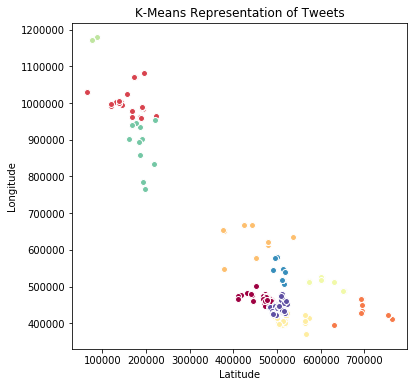

In [56]:
#Set up graph size
fig = plt.figure(figsize=(6, 6))
#Set up graph colors
colors = plt.cm.Spectral(np.linspace(0, 1, n))

#Plot K-Means clusters and points
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(n), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(coordinates[my_members, 0], coordinates[my_members, 1], 'w',
            markerfacecolor=col, marker='o', markersize=6)

#Set the title and labels
plt.title('K-Means Representation of Tweets')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

#Display the graph
plt.show()

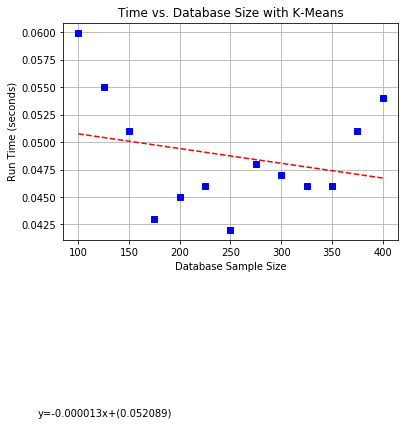

In [22]:
#Set up the graph
plt.figure(1)
plt.plot(sample,t_fin_km100, 'bs')

#Calculate the trend line
z = np.polyfit(sample,t_fin_km100, 1)
p = np.poly1d(z)
plt.plot(sample,p(sample),'r--')

#Graph the trend line and the plot

plt.text(60, .025, 'y=%.6fx+(%.6f)'%(z[0],z[1]))
plt.xlabel('Database Sample Size')
plt.ylabel('Run Time (seconds)')
plt.title('Time vs. Database Size with K-Means')
plt.grid(True)
plt.show()

## DB Scan

In [32]:
t_db = time.time()
counter = 0
t_fin_db100 = []
k_DB = []

#Run DBScan with epsilon of 272
for i in sample:
    db = DBSCAN(eps=272, min_samples=10).fit(coordinates[0:sample[counter],:])
    t_fin_db100.append(time.time() - t_db)
    db_labels = db.labels_
    db_labels_unique = np.unique(db_labels)
    k_DB.append(len(db_labels_unique)) #Number of cluster detected with DBSCAN
    counter = counter + 1
    
#Print the time and clusters that were deteced by DBScan
print(t_fin_db100)
print(k_DB)

[0.00299835205078125, 0.005994558334350586, 0.008992910385131836, 0.012990951538085938, 0.015988826751708984, 0.017988920211791992, 0.019987106323242188, 0.021985292434692383, 0.02498340606689453, 0.027983903884887695, 0.029979467391967773, 0.032978057861328125, 0.03597593307495117]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


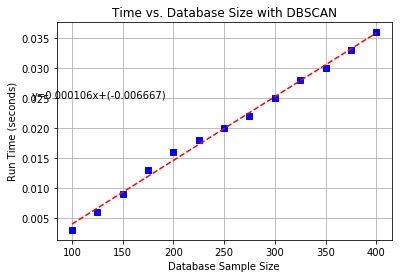

In [33]:
plt.figure(1)
plt.plot(sample,t_fin_db100, 'bs')

#Calcualte the trendline
z = np.polyfit(sample,t_fin_db100, 1)
p = np.poly1d(z)
plt.plot(sample,p(sample),'r--')

#Calculate the line equation:

plt.text(60, .025, 'y=%.6fx+(%.6f)'%(z[0],z[1]))
plt.xlabel('Database Sample Size')
plt.ylabel('Run Time (seconds)')
plt.title('Time vs. Database Size with DBSCAN')
plt.grid(True)
plt.show()

In [47]:
#Calculate DBScan with epsilon with 50000
t_db = time.time()
db = DBSCAN(eps=50000, min_samples=20).fit(coordinates)
t_fin_db = time.time() - t_db

In [48]:
db_labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

db_labels_unique = np.unique(db_labels)

#Show how many clusters were detected with DBScan

print("labels:\n %s, \n  unique labels:\n %s" % (db_labels, db_labels_unique))

labels:
 [ 0  1  0  0  0  0 -1 -1  0  0  0  2  0  1  0  0  0  2 -1  2  0  1  0  1
  0  0  0 -1  2  1  1  0  0  0  0 -1  0  0  0  0  0  0 -1  2  0  0  0  1
  2 -1  0  0  1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  1  0  0  0
  0  0  0  0  0  0  2  2  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  1  0  0  0 -1  0 -1  0  0  0  1  0  0  0  0  0  1  0
  0  0  1  0  1 -1  0  0  0  0 -1  0  0  0 -1  1 -1 -1  2 -1  1  1  0  0
  0  0  0  0  0  1  1 -1  0  0  0  0  0  0  1  0  0  1  0  0  0 -1  0  0
  0  0  0  0  0  1  1  0  0  0  0 -1  1  0  0  0  0 -1 -1  0  0  0  0 -1
  2  0  0  2  0  0  0  2  0  0  0  0 -1  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  1  1  0  0  0  0  1 -1  0  2  0  0  0 -1  0  0  0  0  0  0  0  0
  1  0  0 -1 -1  0  2 -1  0  0  0  0  0  0 -1  0  0  0  0  0  1  0  0 -1
  0  1  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0 -1  0  2  0  2  0
 -1  1  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  2  0  0  0  0
  0  0  0  0  1  0 -1  1  0  0  0  0 -1  0

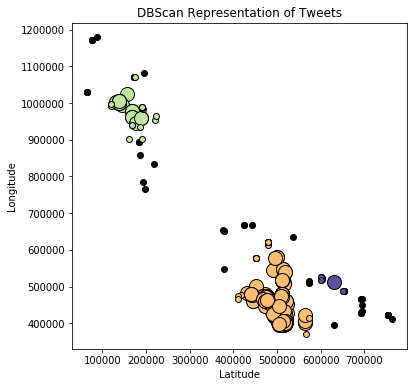

In [58]:
#Create graph
fig = plt.figure(figsize=(6, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(db_labels_unique)))

#Create graph and plot points
for k, col in zip(db_labels_unique, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (db_labels == k)

    xy = coordinates[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = coordinates[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)
    
#Set the plot title and axis and then plot
plt.title('DBScan Representation of Tweets')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Problem 1 questin answers:
1. Max number of clusters in this implementation is 400, as otherwise there are more clusters than samples, meaning max # of clusters is number of items. Typical runtime is about the number of clusters /10.
2. With min_samples set to 10, epsilon must be over 751 to detect more than one cluster. As epsilon rises up through the thousands, the number of clusters detected rises, but drops back down to 1 in the millions. Pattern is similar for the 100 min_samples, but only detects multiple clusters starting in the 20000s